# Linear Regression By Hand
- Gradient Descent Optimization
- Mean Squared Error for Error Loss function

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.xlabel('income')
plt.ylabel('mortality')
plt.title('Linear Regression income vs. infant mortality')

data = pd.read_csv('birthrate.dat', header=None)

rows = data.shape[0]
cols = data.shape[1]

data = data.values
data = data[np.arange(0,rows), :]

X = data[:, 2]
Y = data[:, 1]

X_max = np.max(X)
Y_max = np.max(Y)


X = np.true_divide(X, X_max)
Y = np.true_divide(Y, Y_max)
plt.xlim(0, max(X))
plt.ylim(0, max(Y))

(0, 1.0)

 b0: -0.4814979155104818 b1: 0.9812342738533784 b2: 0.9721517148989002 Error: 0.6444371870322341
 b0: -0.46284796954869795 b1: 0.9632250627119294 b2: 0.9451948003646455 Error: 0.6153998947018111
 b0: -0.4441917044328018 b1: 0.9458752099257065 b2: 0.919050819527941 Error: 0.5877600550329869
 b0: -0.42563414342331357 b1: 0.9291089796974364 b2: 0.8936570652590017 Error: 0.5614242392021352
 b0: -0.40725263727277156 b1: 0.9128669466865869 b2: 0.8689628470016231 Error: 0.5363157912069256
 b0: -0.3891035801688278 b1: 0.8971021145944156 b2: 0.8449266696515456 Error: 0.5123687676307146
 b0: -0.37122750792135756 b1: 0.881776967948271 b2: 0.8215140898100686 Error: 0.48952439595839997
 b0: -0.3536529678043555 b1: 0.8668612324951824 b2: 0.7986960864121124 Error: 0.46772898713904837
 b0: -0.33639945573459845 b1: 0.8523301736712686 b2: 0.7764478219600602 Error: 0.4469326886723961
 b0: -0.31947964530005946 b1: 0.8381633036590164 b2: 0.7547477003839904 Error: 0.4270887242831069
 b0: -0.3029010791118969

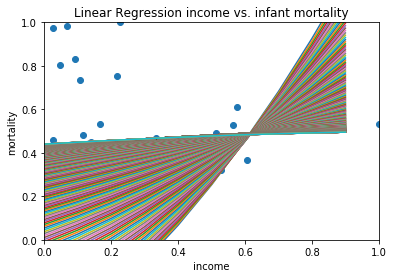

In [5]:
import matplotlib.pyplot as plt

#batch 1 == iteration 1
#United States,24.7,1723,0.12,27.2
#Argentina,24.7,287,0.20,62.0
#New Zealand,24.4,970,0.19,24.9

def calc_total_Error(row, col):
    return (b2*row**2 + b1*row+b0 - col)**2

def calc_b0_Error(row, col):
    return (b2*row**2 + b1*row+b0 - col)

def calc_b1_Error(row, col):
    return (b2*row**2 + b1*row+b0 - col) * row

def calc_b2_Error(row, col):
    return (b2*row**2 + b1*row+b0 - col) * row**2

# helper wrapper function for us to plug in error function to use
def useErrorFunction(errorFunction, args):
    return errorFunction(*args)
    
def mse(X,Y, errorFunction):
    errorsList = []
    for (row, col) in zip(X,Y):
        val = useErrorFunction(errorFunction, (row, col))
        errorsList.append(val)  
    ERROR_SUM = sum(errorsList)
    return ERROR_SUM / 3

def adjustWeight(weight, learn, temp_error):
    return weight - learn * temp_error

sample_size = 4
sorted_sample = [
    mylist[i] for i in sorted(random.sample(range(len(mylist)), sample_size))
]


b2 = 1.0
b1 = 1.0
b0 = -0.5

learn = 0.1

plt.scatter(X, Y)
plt.pause(0.1);

sample_X = X[0:5]
sample_Y = Y[0:5]

for i in range(500):
    ERROR = mse(sample_X, sample_Y, calc_total_Error)
    b0_temp_error = mse(sample_X, sample_Y, calc_b0_Error)
    b1_temp_error = mse(sample_X, sample_Y, calc_b1_Error)
    b2_temp_error = mse(sample_X, sample_Y, calc_b2_Error)
    b0 = adjustWeight(b0, learn, b0_temp_error)
    b1 = adjustWeight(b1, learn, b1_temp_error)
    b2 = adjustWeight(b2, learn, b2_temp_error)
    print(" b0: " + str(b0) + " b1: " + str(b1) + " b2: " + str(b2) + " Error: " + str(ERROR))
    # How to plot the graph
    X_test = np.arange(0,1,0.1)
    plt.plot (X_test, b2*X_test**2+ b1*X_test + b0)
    plt.pause(0.1)


# # run for as many learning epochs as needed in a loop
# for i in range(1):
#     #calculate error - MSE (b1*x1+b0 -y1)**2
#     ERROR = ((b2*X1**2+ b1*X1+b0 - Y1)**2 + (b2*X2**2+ b1*X2+b0 - Y2)**2 + (b2*X3**2+ b1*X3+b0 - Y3)**2)/3
#     print("ERROR")
#     print(ERROR)
#     #calculate b0 adj b0 = b0 - mu * sum E
#     #
#     b0_temp_error = ((b2*X1**2+b1*X1+b0 - Y1) + (b2*X2**2+b1*X2+b0 - Y2) + (b2*X3**2+b1*X3+b0 - Y3))/3
#     print("b0 error")
#     print(b0_temp_error)
#     #calculate b1 adj b1 = b1 - mu * sum(E * x1)
#     b1_temp_error = ((b2*X1**2+b1*X1+b0 - Y1) *X1 + (b2*X2**2+b1*X2+b0 - Y2)*X2 + (b2*X3**2+b1*X3+b0 - Y3)*X3)/3
#     print("b1 error")
#     print(b1_temp_error)

#     b2_temp_error = ((b2*X1**2+b1*X1+b0 - Y1) *X1**2 + (b2*X2**2+b1*X2+b0 - Y2)*X2**2 + (b2*X3**2+b1*X3+b0 - Y3)*X3**2)/3
#     #adjust bo and b1 --- b_i = old b_i - learning * error loss derivative
#     b0 = b0 - learn * b0_temp_error
#     b1 = b1 - learn * b1_temp_error
#     b2 = b2 - learn * b2_temp_error
#     print(" b0: " + str(b0) + " b1: " + str(b1) + " b2: " + str(b2) + " Error: " + str(ERROR))

#     # How to plot the graph
#     X_test = np.arange(0,1,0.1)
#     plt.plot (X_test, b2*X_test**2+ b1*X_test + b0)
#     plt.pause(0.1)


plt.show()